In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
data=pd.read_csv("MNIST_train.csv")

In [18]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#seperate the label
l=data['label']

In [20]:
#New data column
data=data.drop('label',axis=1)

In [24]:
print(l.shape)
print(data.shape)

(42000,)
(42000, 784)


9


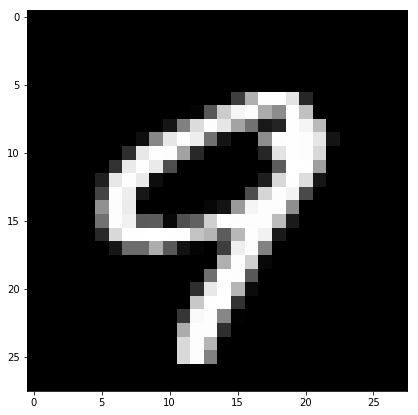

In [28]:
plt.figure(figsize=(7,7))
idx=100

grid_data=data.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")

print(l[idx])

# Principal Component Analysis

In [29]:
#Take a subset of points- 15k points
label=l.head(15000)
data=data.head(15000)

In [31]:
print(label.shape)
print(data.shape)

(15000,)
(15000, 784)


In [32]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler
standardizedData=StandardScaler().fit_transform(data)
print(standardizedData.shape)

(15000, 784)


In [33]:
#Compute Covriance Matrix
sample_data=standardizedData
covar_matrix=np.matmul(sample_data.T,sample_data)
print("Shape of covariance matrix",covar_matrix.shape)

Shape of covariance matrix (784, 784)


In [37]:
#Computing top two eigen values and eigen vectors
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print("Shape of eigen vectors",vectors.shape)
vectors=vectors.T
print("Updated shape of eigen vectors",vectors.shape)

Shape of eigen vectors (784, 2)
Updated shape of eigen vectors (2, 784)


In [38]:
#Projecting original sample onto the plane.
#formed by two principal eigen vectors by vector-vector multiplication
new_coordinates=np.matmul(vectors,sample_data.T)

In [39]:
print("Resultant new data points shape",vectors.shape,"X",sample_data)

Resultant new data points shape (2, 784) X [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
new_coordinates=np.vstack((new_coordinates,label)).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st principal","2nd principal","label"))
print(dataframe.head())

   1st principal  2nd principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


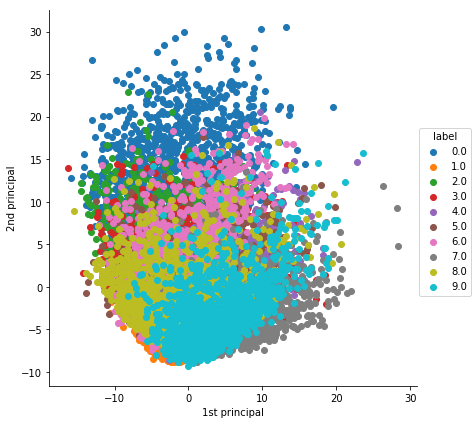

In [43]:
#Plot data with seaborn
import seaborn as sns
sns.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.show()

# PCA using sklearn

In [46]:
from sklearn import decomposition
pca=decomposition.PCA()

In [47]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print("Shape of PCA data",pca_data.shape)

Shape of PCA data (15000, 2)


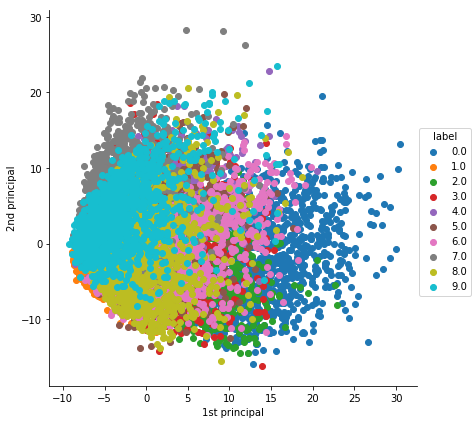

In [49]:
#plot PCA data
pca_data=np.vstack((pca_data.T,label)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st principal","2nd principal","label"))
sns.FacetGrid(pca_df,hue="label",size=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

For dimension reduction, not visualisation, PCA

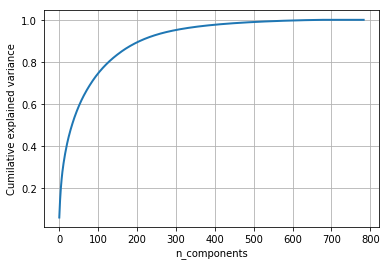

In [52]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_variance_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_variance_explained)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumilative explained variance')
plt.show()

# T-Sne with Sklearn

In [53]:
from sklearn.manifold import TSNE

In [54]:
data_1000=standardizedData[0:1000,:]
label_1000=label[0:1000]

In [55]:
model=TSNE(n_components=2,random_state=0)

In [56]:
tsne_data=model.fit_transform(data_1000)

In [59]:
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim 1","Dim 2","labels"))

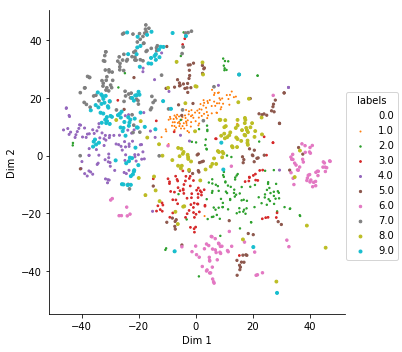

In [67]:
sns.FacetGrid(data=tsne_df,hue="labels",size=5).map(plt.scatter,'Dim 1','Dim 2','labels').add_legend()
plt.show()

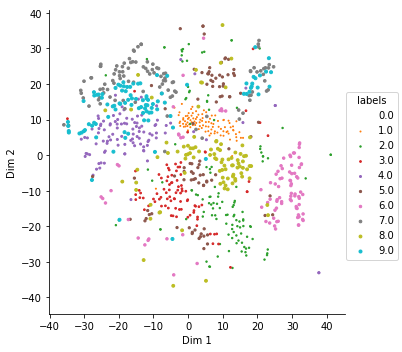

In [68]:
model=TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim 1","Dim 2","labels"))
sns.FacetGrid(data=tsne_df,hue="labels",size=5).map(plt.scatter,'Dim 1','Dim 2','labels').add_legend()
plt.show()

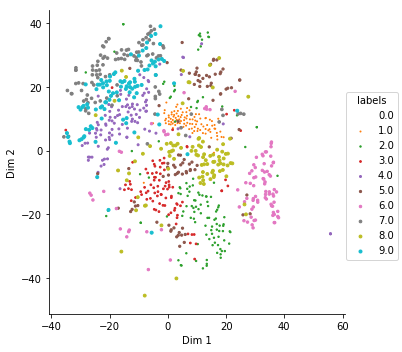

In [69]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim 1","Dim 2","labels"))
sns.FacetGrid(data=tsne_df,hue="labels",size=5).map(plt.scatter,'Dim 1','Dim 2','labels').add_legend()
plt.show()

In [ ]:
model=TSNE(n_components=2,random_state=0,perplexity=2)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim 1","Dim 2","labels"))
sns.FacetGrid(data=tsne_df,hue="labels",size=5).map(plt.scatter,'Dim 1','Dim 2','labels').add_legend()
plt.show()